In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split

data=pd.read_csv('sleep_final.csv')
data=data.dropna()
data.head(5)

x=data['Time slept(in hrs)'].values.reshape(-1,1)
y=data['Time active(in hrs)'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestRegressor
  
regressor = RandomForestRegressor()
  
regressor.fit(x_train,y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
y_pred = regressor.predict(x_test)
regressor.predict([[5.2]])

array([8.56929631])

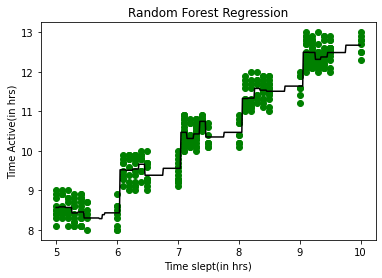

In [103]:
X_grid = np.arange(min(x), max(x), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'green')  
plt.plot(X_grid, regressor.predict(X_grid),color = 'black') 
plt.title('Random Forest Regression')
plt.xlabel('Time slept(in hrs)')
plt.ylabel('Time Active(in hrs)')
plt.show()


In [104]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_2=r2_score(y_test,y_pred)

print('Mean Square Error - {}'.format(mse))
print('R2 Score - {}'.format(r_2))

Mean Square Error - 0.06918372747752735
R2 Score - 0.9696341072455221
